In [58]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.optimizers import COBYLA
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit


In [59]:
from sklearn.datasets import load_iris

iris_data = load_iris()

x = iris_data.data
y = iris_data.target

In [60]:
from sklearn.preprocessing import MinMaxScaler
x_normal = MinMaxScaler().fit_transform(x)

In [61]:
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, random_state=algorithm_globals.random_seed)

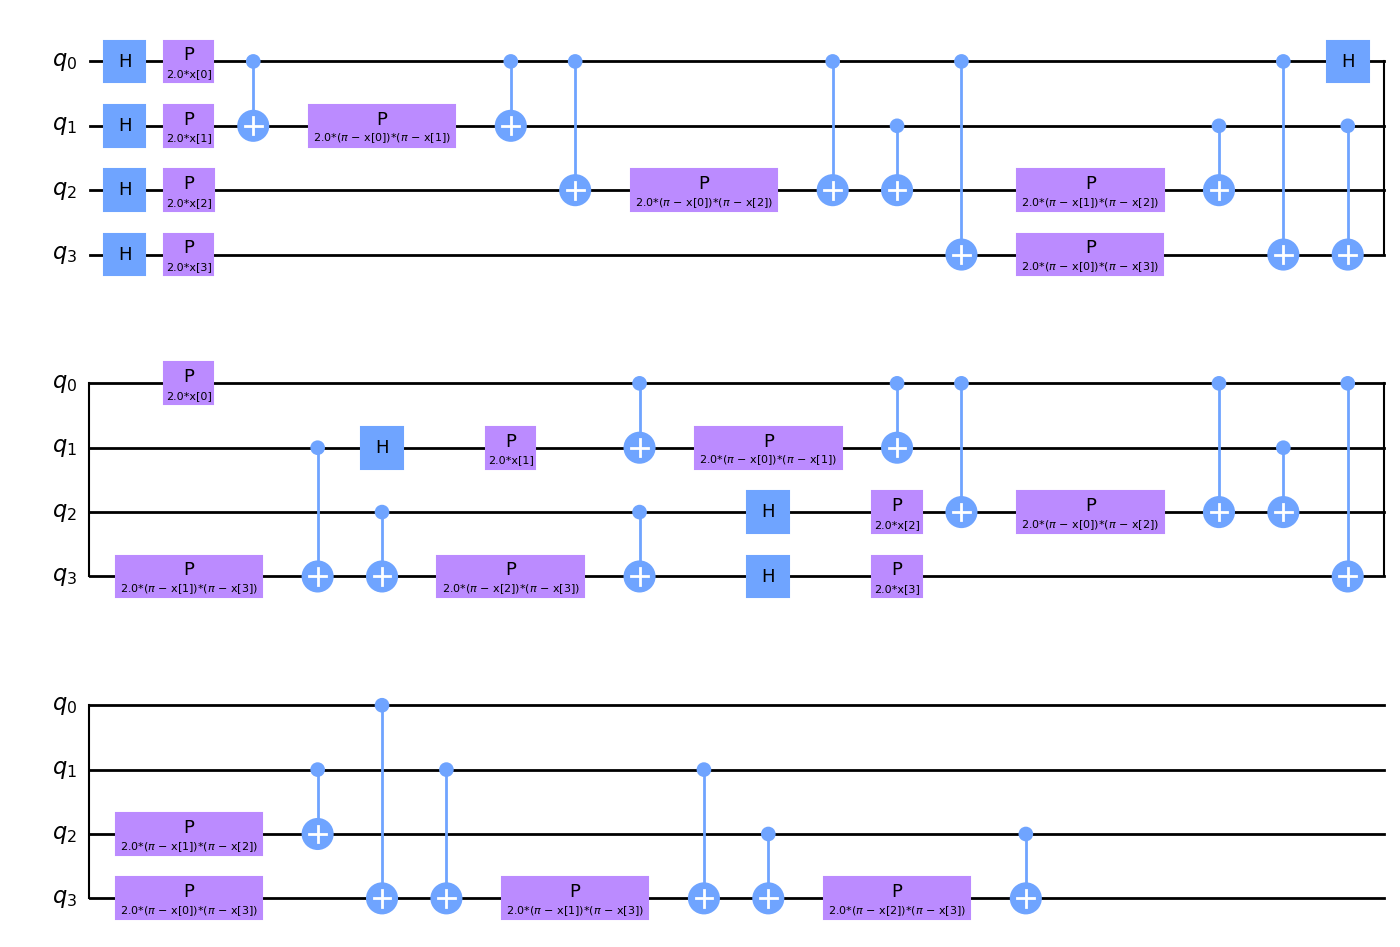

In [69]:
from qiskit.circuit.library import ZZFeatureMap

jum_fitur = x.shape[1]

feature_map = ZZFeatureMap(feature_dimension=jum_fitur, reps=2)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

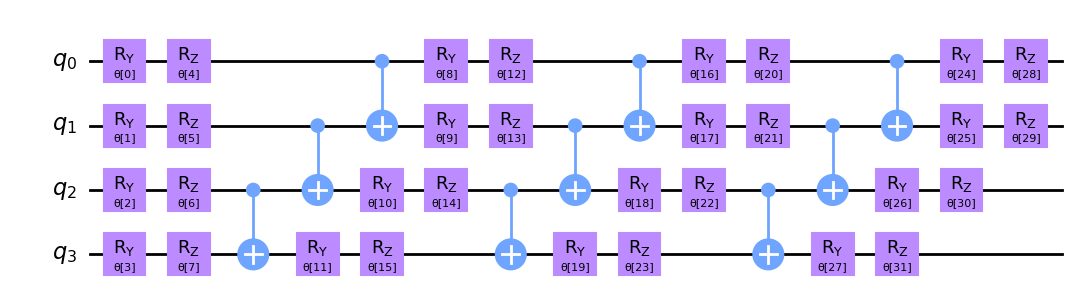

In [63]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=jum_fitur, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [64]:
from qiskit_machine_learning.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [67]:
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler()

In [68]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

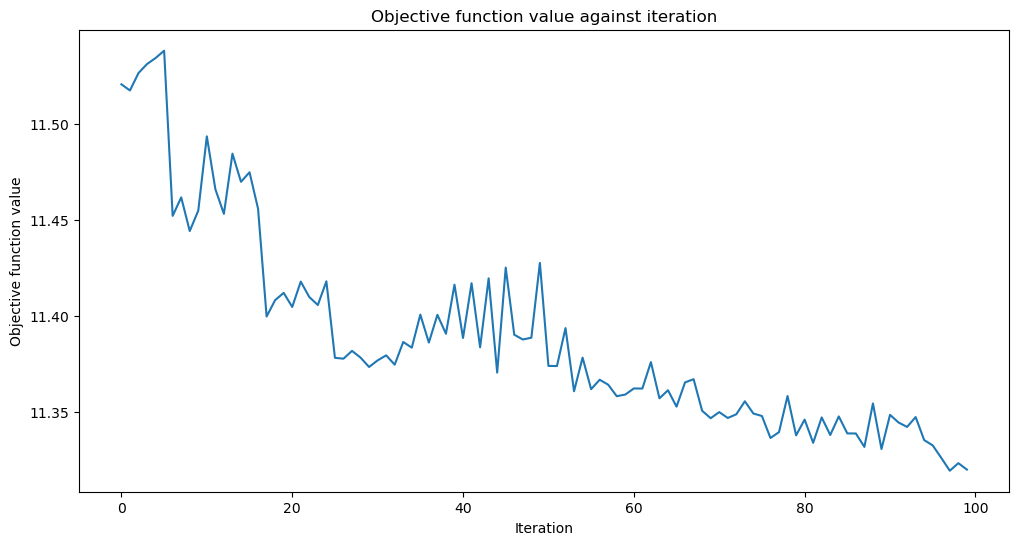

Training time: 293 seconds


In [56]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_x, train_y)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [57]:
train_score_q2_ra = vqc.score(train_x, train_y)
test_score_q2_ra = vqc.score(test_x, test_y)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.53
Quantum VQC on the test dataset using RealAmplitudes:     0.37
